<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/PSant%C3%A9_02_notebookexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 2

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 2


Importation des librairies nécessaires au projet

In [3]:
import pandas as pad 
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df = pad.read_csv('data_projet2_clean.csv', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Exploration rapide des données

In [7]:
df.shape

(320772, 14)

In [8]:
df.head()

,code_bar,countries,product_name,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutrition-score,Organic_product
0,3087,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
1,4530,États-Unis,Banana Chips Sweetened (Whole),0.0,2243.0,28.57,NaN,64.29,14.29,3.6,3.57,0.00000,14.0,no
2,4559,États-Unis,Peanuts,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,NaN,0.63500,0.0,no
3,16087,États-Unis,Organic Salted Nut Mix,0.0,2540.0,NaN,5.36,17.86,3.57,7.1,NaN,1.22428,12.0,yes
4,16094,États-Unis,Organic Polenta,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,yes


# Création des variables d'intérêt :
  - « Produce_in_UE » (information si production en Union-Européene)
  - « Theoric_carbon_footprint » (information sur l’empreinte carbone théorique)
  - « Organic » (information si production en Union-Européene)


In [9]:
liste_pays_europe = ["Allemagne", "Royaume-Uni", "France", "Slovénie", "Pays-Bas", "Belgique", "Espagne", "Suisse", "Irlande", "Portugal", "Roumanie", "Italie", "Moldavie", "Scotland", "Serbie", "Pologne", "Grèce", "République tchèque", "Hongrie", "Bulgarie", "Danemark", "Suède", "Norvège", "Slovaquie", "Ukraine", "Island", "Autriche", "Luxembourg"]
in_UE_list = []

for elm in df['countries']:
  for i in range(len(liste_pays_europe)):
    if liste_pays_europe[i] in str(elm):
      in_UE = "yes"
      break
    else:
      in_UE = "no"  
  if in_UE == "yes":
    in_UE_list.append("yes")
  elif in_UE == "no":
    in_UE_list.append("no")
#print(in_UE_list)
print(in_UE_list.count('yes'))

df['Produce_in_UE'] = in_UE_list

139336


Ajouter une nouvelle colonne nous informant sur l'empreinte carbonne théorique (suivant documentations/sources fiables) d'une alimentation annuelle (en tCO2/an) consommant ce type de produit en se basant sur la nouvelle colonne df['Produce_in_UE']

In [10]:
empreinte_carbonne_théorique_list = []

for i in range(len(df['Produce_in_UE'])):
  if "yes" in str(df['Produce_in_UE'][i]):
    empreinte_carbonne_théorique_list.append(0.31)
  else:
    empreinte_carbonne_théorique_list.append(0.48)

df['Empreinte_carbonne_théorique'] = empreinte_carbonne_théorique_list

**Meilleure méthode below :**

In [11]:
df['Empreinte_carbonne_théorique'] = np.where(df['Produce_in_UE'] == "yes", 0.31, 0.48)

Ajouter une nouvelle colonne "*Organic_product*" en se basant sur la variable "*product_name*"

In [5]:
bio_list = []

for i in range(len(df['product_name'])):
  if "Organic" in str(df['product_name'][i]) or "organic" in str(df['product_name'][i]) or "biologique" in str(df['product_name'][i]) or "organisch" in str(df['product_name'][i]) or "organico " in str(df['product_name'][i]):
    bio_list.append("yes")
  else:
    bio_list.append("no")

df['Organic_product'] = bio_list
df['Organic_product'].value_counts()

no     311006
yes      9766
Name: Organic_product, dtype: int64

Vérification des variables crées

In [ ]:
df.head()

,code_bar,countries,product_name,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutrition-score,Produce_in_UE,Empreinte_carbonne_théorique,Organic_product
0,3087,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,0.48,no
1,4530,États-Unis,Banana Chips Sweetened (Whole),0.0,2243.0,28.57,NaN,64.29,14.29,3.6,3.57,0.00000,14.0,no,0.48,no
2,4559,États-Unis,Peanuts,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,NaN,0.63500,0.0,no,0.48,no
3,16087,États-Unis,Organic Salted Nut Mix,0.0,2540.0,NaN,5.36,17.86,3.57,7.1,NaN,1.22428,12.0,no,0.48,yes
4,16094,États-Unis,Organic Polenta,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,no,0.48,yes


# Analyse univariée de chaques variables

Exploration gloable des variables quantitatives d'intérêt

In [12]:
## POUR CHANGER COULEUR sns.set_palette("bright") 
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette) 

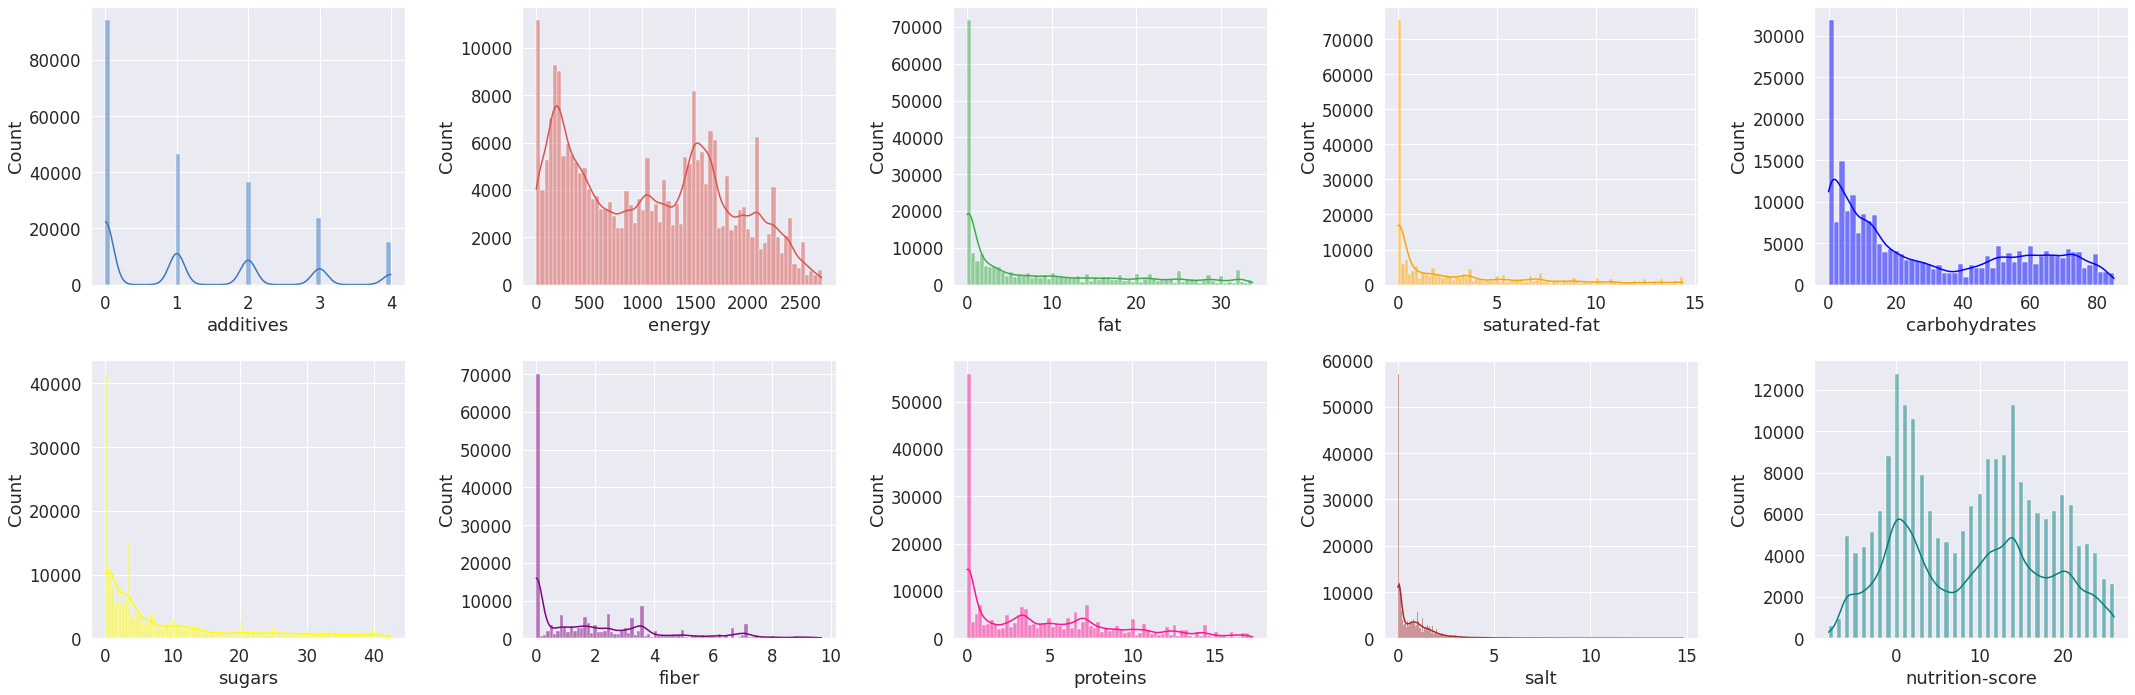

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

sns.histplot(data=df, x="additives", kde=True, ax=axs[0, 0], color = custom_palette[0])
sns.histplot(data=df, x="energy", kde=True, ax=axs[0, 1], color = custom_palette[1])
sns.histplot(data=df, x="fat", kde=True, ax=axs[0, 2], color = custom_palette[2])
sns.histplot(data=df, x="saturated-fat", kde=True, ax=axs[0, 3], color = custom_palette[3])
sns.histplot(data=df, x="carbohydrates", kde=True, ax=axs[0, 4], color = custom_palette[4])
sns.histplot(data=df, x="sugars", kde=True, ax=axs[1, 0], color = custom_palette[5])
sns.histplot(data=df, x="fiber", kde=True, ax=axs[1, 1], color = custom_palette[6])
sns.histplot(data=df, x="proteins", kde=True, ax=axs[1, 2], color = custom_palette[7])
sns.histplot(data=df, x="salt", kde=True, ax=axs[1, 3], color = custom_palette[8])
sns.histplot(data=df, x="nutrition-score", kde=True, ax=axs[1, 4], color = custom_palette[9])

plt.tight_layout()
fig.savefig("Global_exploration_quantitative_variables", dpi=400)
plt.show()

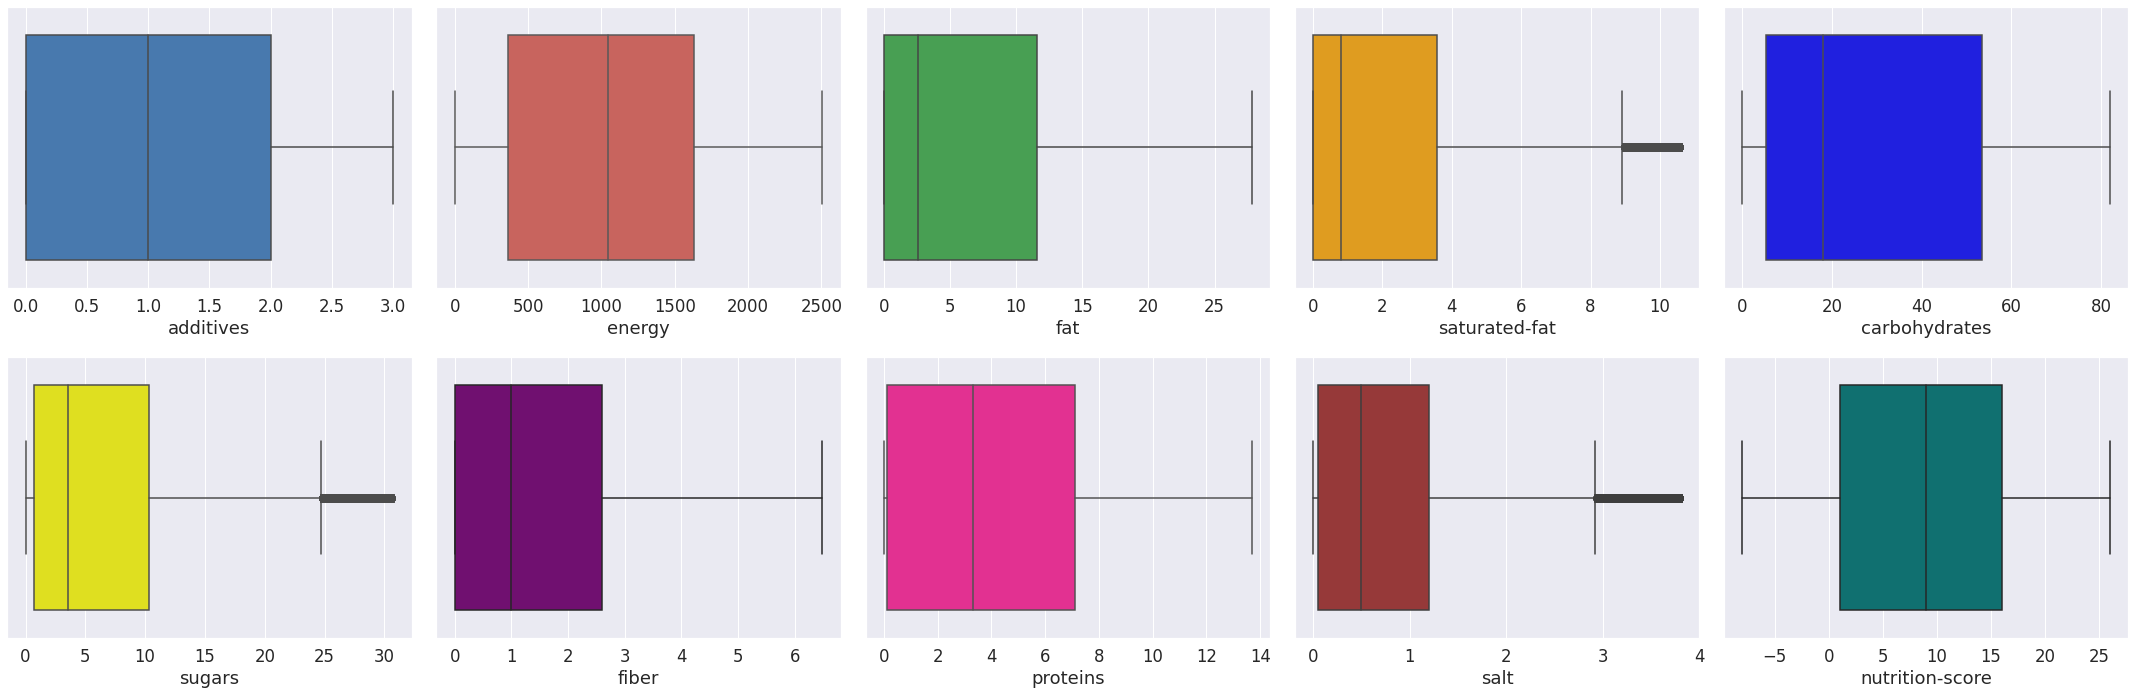

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

sns.boxplot(data=df, x="additives", ax=axs[0, 0], color = custom_palette[0])
sns.boxplot(data=df, x="energy", ax=axs[0, 1], color = custom_palette[1])
sns.boxplot(data=df, x="fat", ax=axs[0, 2], color = custom_palette[2])
sns.boxplot(data=df, x="saturated-fat", ax=axs[0, 3], color = custom_palette[3])
sns.boxplot(data=df, x="carbohydrates", ax=axs[0, 4], color = custom_palette[4])
sns.boxplot(data=df, x="sugars", ax=axs[1, 0], color = custom_palette[5])
sns.boxplot(data=df, x="fiber", ax=axs[1, 1], color = custom_palette[6])
sns.boxplot(data=df, x="proteins", ax=axs[1, 2], color = custom_palette[7])
sns.boxplot(data=df, x="salt", ax=axs[1, 3], color = custom_palette[8])
sns.boxplot(data=df, x="nutrition-score", ax=axs[1, 4], color = custom_palette[9])
plt.tight_layout()
fig.savefig("Global_exploration_quantiatives_variables", dpi=400)
plt.show()

In [ ]:
df.describe()

,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutrition-score,Empreinte_carbonne_théorique
count,216211.000000,254829.000000,219810.000000,204283.000000,233511.000000,212480.000000,188303.000000,229240.000000,251671.000000,217376.000000,3.207720e+05
mean,1.163488,1072.798673,8.307535,3.008992,29.446723,9.076937,1.975555,4.746672,0.969139,8.941378,4.800000e-01
std,1.284816,732.113176,9.957243,3.876430,26.829507,11.061136,2.304492,4.558346,1.453288,8.771823,4.244389e-13
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,4.800000e-01
25%,0.000000,368.000000,0.000000,0.000000,5.420000,0.880000,0.000000,0.400000,0.060000,1.000000,4.800000e-01
50%,1.000000,1059.000000,3.390000,1.160000,18.630000,3.700000,1.200000,3.570000,0.551180,9.000000,4.800000e-01
75%,2.000000,1644.000000,14.970000,5.000000,54.930000,13.270000,3.300000,7.500000,1.313180,16.000000,4.800000e-01
max,4.000000,2700.000000,33.720000,14.400000,84.850000,42.550000,9.700000,17.270000,14.815820,26.000000,4.800000e-01


Exploration gloable des variables qualitatives d'intérêt

In [ ]:
df.head()

<Figure size 432x288 with 0 Axes>

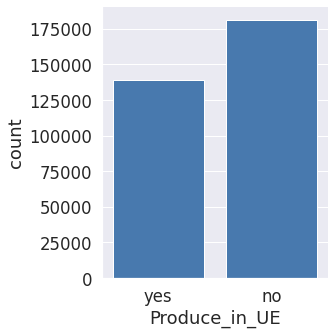

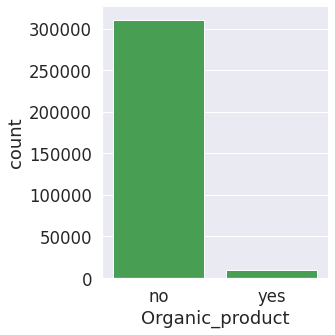

In [ ]:
fig = plt.figure()
ax1 = sns.catplot(data=df, x="Produce_in_UE", kind="count", color = custom_palette[0])
ax2 = sns.catplot(data=df, x="Organic_product", kind="count", color = custom_palette[2])
ax1.savefig("Global_exploration_Produce_in_UE", dpi=400)
ax2.savefig("Global_exploration_Organic_Product", dpi=400)

Représentation diagramme circulaire variables qualitatives

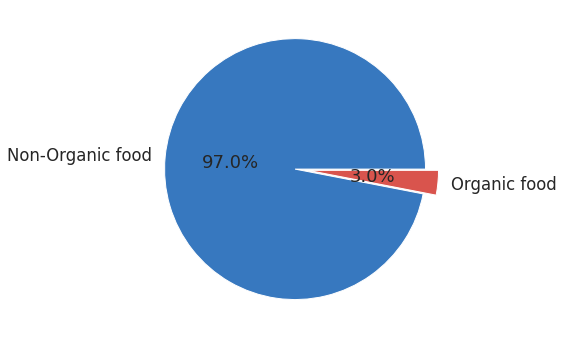

In [ ]:
data = df['Organic_product'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = ("Non-Organic food", "Organic food")
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
pie.savefig("Proportion of organic food.png")

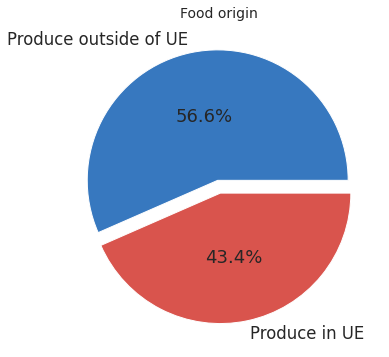

In [ ]:
data = df['Produce_in_UE'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = ("Produce outside of UE", "Produce in UE")
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Food origin", fontsize=14);
pie.savefig("Food_origin_circ_diag.png")

# Analyse mulitvariées de chaques variables

Etant donnée que l'on veut comparer les données des variables entre elles (données appariées) on supprimer les lignes qui ont des NaN :

In [13]:
for elm in df:
  df = df[df[elm].notna()]

Visualisation gloable des corrélations/liens entre les variables quantitatives

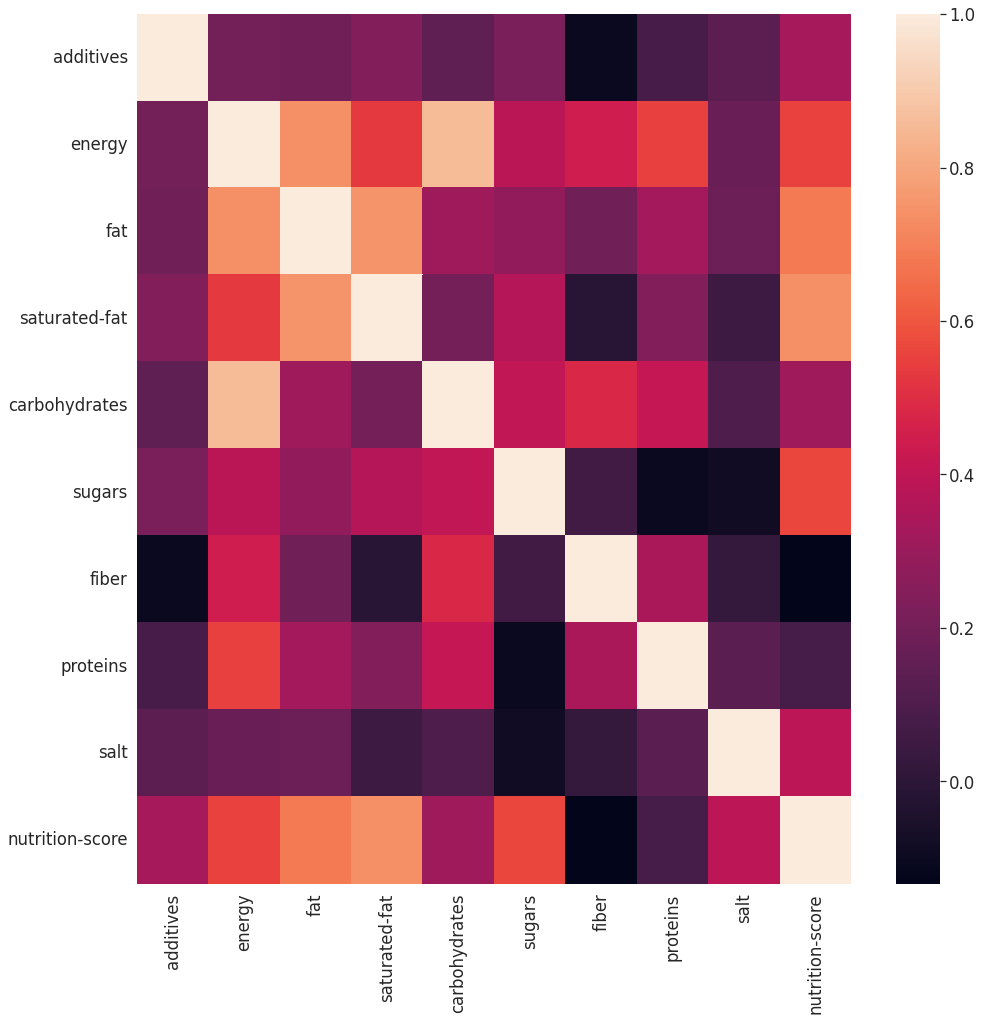

In [ ]:
list_of_quantitative_variables_to_analyse = ["additives", "energy", "fat", "saturated-fat", "carbohydrates", "sugars", "fiber", "proteins", "salt", "nutrition-score"]
dfQ = df[list_of_quantitative_variables_to_analyse]
dfQ.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(16, 16))
ax = sns.heatmap(dfQ.corr())
figure= ax.get_figure()
figure.savefig("heatmap_quantitative_variables", dpi=400)

Carte de corrélation avec les valeurs de R seulement si p_value significative

In [ ]:
dfQ.describe()

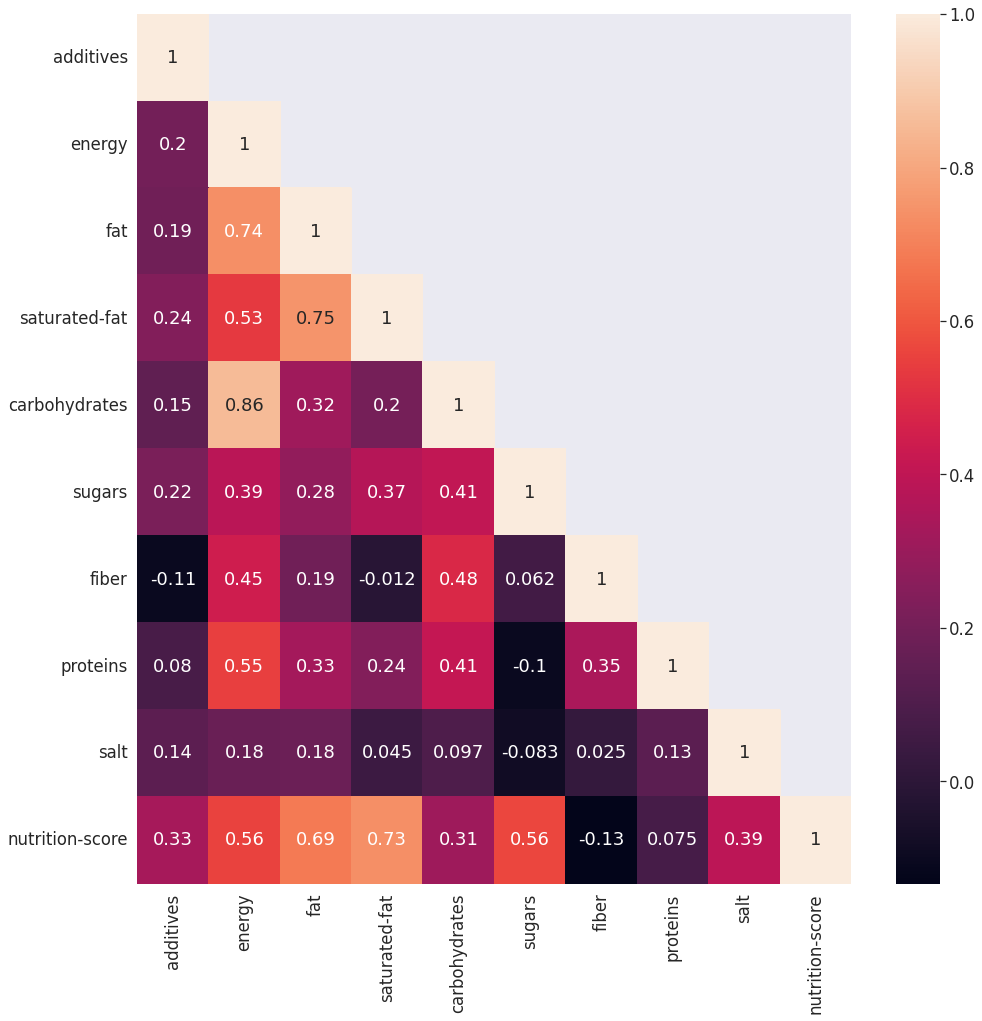

In [ ]:
def corr_sig(df=None):
	p_matrix = np.zeros(shape=(dfQ.shape[1],dfQ.shape[1]))
	for col in dfQ.columns:
		for col2 in dfQ.drop(col,axis=1).columns:
			_ , p = stats.pearsonr(dfQ[col],dfQ[col2])
			p_matrix[dfQ.columns.to_list().index(col),dfQ.columns.to_list().index(col2)] = p
	return p_matrix

p_values = corr_sig(dfQ)                     # get p-Value
mask = np.invert(np.tril(p_values<0.001))    # mask - only get significant corr

plt.figure(figsize=(16, 16))
ax = sns.heatmap(dfQ.corr(), mask=mask, annot=True)
figure_pvalue= ax.get_figure()
figure_pvalue.savefig("heatmap_quantitative_variables_pvalue", dpi=400)

Carte de corrélation avec les valeurs de R seulement si p_value significative et si facteur de corrélation supérieur à 0.45

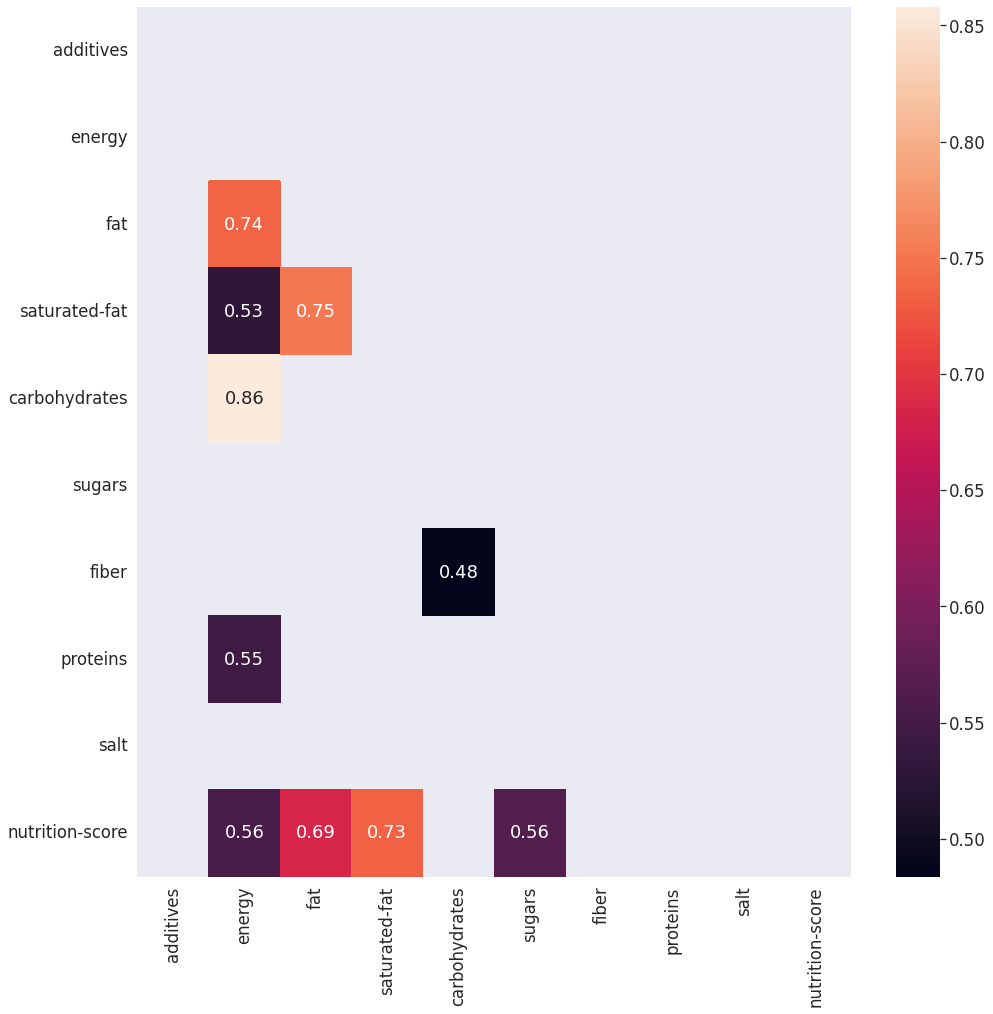

In [ ]:
def corr_corr(df=None):
	corr = np.zeros(shape=(dfQ.shape[1],dfQ.shape[1]))
	for col in dfQ.columns:
		for col2 in dfQ.drop(col,axis=1).columns:
			c , p = stats.pearsonr(dfQ[col],dfQ[col2])
			corr[dfQ.columns.to_list().index(col),dfQ.columns.to_list().index(col2)] = c
	return corr


def corr_pvalue(df=None):
	p_matrix = np.zeros(shape=(dfQ.shape[1],dfQ.shape[1]))
	for col in dfQ.columns:
		for col2 in dfQ.drop(col,axis=1).columns:
			c , p = stats.pearsonr(dfQ[col],dfQ[col2])
			p_matrix[dfQ.columns.to_list().index(col),dfQ.columns.to_list().index(col2)] = p
	return p_matrix


p_values = corr_pvalue(dfQ)                   # get p-values
corr = corr_corr(dfQ)                     # get R values
maskP = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
maskR = np.invert(np.tril(corr>0.45))
mask = maskP + maskR

plt.figure(figsize=(16, 16))
ax = sns.heatmap(dfQ.corr(), mask=mask, annot=True)
figure_pvalue_corr= ax.get_figure()
figure_pvalue_corr.savefig("heatmap_quantitative_variables_pvalue_corr", dpi=400)

## Analyse multivariée -- Aspect Santé

Pour savoir si l'on pourra utiliser un test de student pour ces analyses, il faut s'assurer que les valeurs suivent une loi normale => test de *Shapiro*

In [ ]:
for elm in dfQ:
	result_shapiro = stats.shapiro(dfQ[elm])
	if result_shapiro[1]< 0.05:
		print("La variable " + str(elm + " suit une loi normale (p = " + str(result_shapiro[1])) + ")")
	if result_shapiro[1]> 0.05:
		print("La variable " + str(elm + " ne suit pas une loi normale (p = " + str(result_shapiro[1])) + ")")

La variable additives suit une loi normale (p = 0.0)
La variable energy suit une loi normale (p = 0.0)
La variable fat suit une loi normale (p = 0.0)
La variable saturated-fat suit une loi normale (p = 0.0)
La variable carbohydrates suit une loi normale (p = 0.0)
La variable sugars suit une loi normale (p = 0.0)
La variable fiber suit une loi normale (p = 0.0)
La variable proteins suit une loi normale (p = 0.0)
La variable salt suit une loi normale (p = 0.0)
La variable nutrition-score suit une loi normale (p = 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Comment varie le nutri-score en fonction des éléments qui composent l'aliment ?

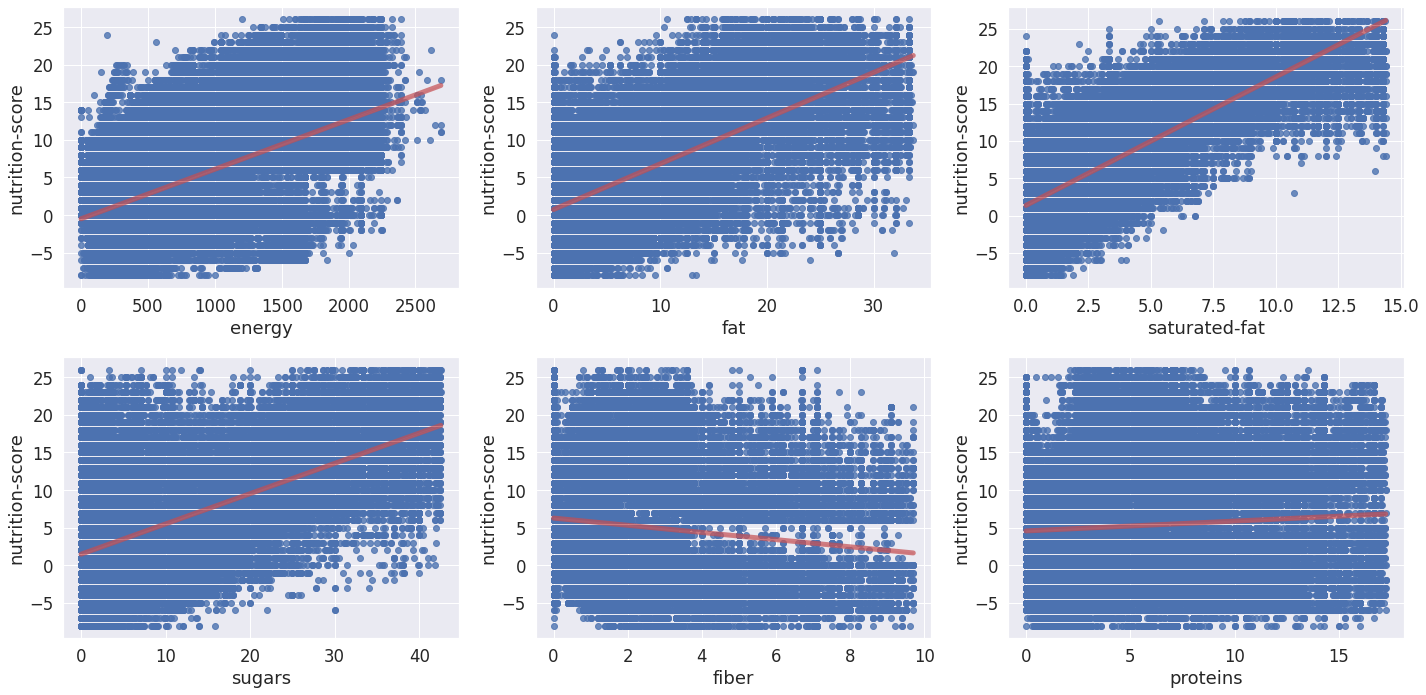

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.regplot(x=df['energy'], y=df['nutrition-score'], data=df, ax=axs[0, 0], line_kws={"color":"r","alpha":0.7,"lw":5})
sns.regplot(x=df['fat'], y=df['nutrition-score'], data=df, ax=axs[0, 1], line_kws={"color":"r","alpha":0.7,"lw":5})
sns.regplot(x=df['saturated-fat'], y=df['nutrition-score'], ax=axs[0, 2], data=df, line_kws={"color":"r","alpha":0.7,"lw":5})
sns.regplot(x=df['sugars'], y=df['nutrition-score'], data=df, ax=axs[1, 0], line_kws={"color":"r","alpha":0.7,"lw":5})
sns.regplot(x=df['fiber'], y=df['nutrition-score'], data=df, ax=axs[1, 1], line_kws={"color":"r","alpha":0.7,"lw":5})
sns.regplot(x=df['proteins'], y=df['nutrition-score'], data=df, ax=axs[1, 2], line_kws={"color":"r","alpha":0.7,"lw":5})

plt.tight_layout()
fig.savefig("Correlation between variables and nutriscore", dpi=400)
plt.show()

Les variables "energy , fat, saturated-fat et sugars" sont similaires, une PCA pour obtenir une variable représentative de ces trois variables pourraient être interessante

In [14]:
## Normalisation des données pour PCA
features = ['energy', 'fat', 'saturated-fat', 'sugars']
x = df.loc[:, features].values
y = df.loc[:,['nutrition-score']].values
x = StandardScaler().fit_transform(x)

In [39]:
## Fabrication de la dataframe PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pad.DataFrame(data = principalComponents, columns = ['principal component'])
dfNutri = df['nutrition-score']
dfNutri.reset_index(inplace=True, drop=True)
PCAdf = pad.concat([principalDf, dfNutri], axis = 1)

In [42]:
PCAdf.head()

,principal component,nutrition-score
0,2.076214,7.0
1,1.777024,0.0
2,-0.320740,-6.0
3,2.696800,14.0
4,3.998259,15.0


In [30]:
PCAdf.describe()

,principal component,nutrition-score
count,9.310100e+04,93101.000000
mean,6.834130e-16,5.267613
std,1.605037e+00,7.791624
min,-1.847137e+00,-8.000000
25%,-1.313219e+00,-1.000000
50%,-4.972332e-01,3.000000
75%,9.950434e-01,11.000000
max,5.713770e+00,26.000000


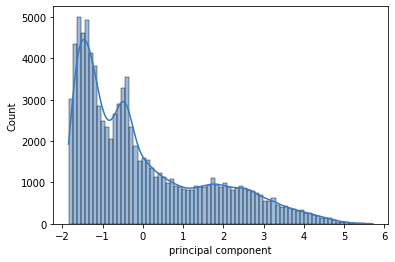

In [43]:
sns.histplot(data=PCAdf, x="principal component", kde=True, color = custom_palette[0])

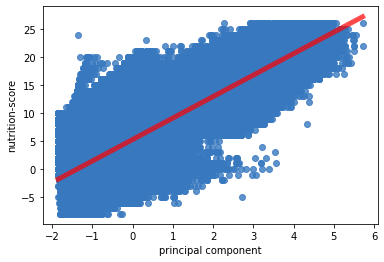

In [41]:
sns.regplot(x=PCAdf['principal component'], y=PCAdf['nutrition-score'], data=PCAdf, line_kws={"color":"r","alpha":0.7,"lw":5})

In [48]:
R, p = stats.pearsonr(df['energy'],PCAdf['nutrition-score'])
print("Valeur de corrélation (R) de 'nutrition-score' avec 'energy' : " + str(round(R,2)))
R, p = stats.pearsonr(df['fat'],PCAdf['nutrition-score'])
print("Valeur de corrélation (R) de 'nutrition-score' avec 'fat' : " + str(round(R,2)))
R, p = stats.pearsonr(df['saturated-fat'],PCAdf['nutrition-score'])
print("Valeur de corrélation (R) de 'nutrition-score' avec 'saturated-fat' : " + str(round(R,2)))
R, p = stats.pearsonr(df['sugars'],PCAdf['nutrition-score'])
print("Valeur de corrélation (R) de 'nutrition-score' avec 'sugars' : " + str(round(R,2)))
R, p = stats.pearsonr(PCAdf['principal component'],PCAdf['nutrition-score'])
print("Valeur de corrélation (R) de 'nutrition-score' avec 'principal component' : " + str(round(R,2)))

Valeur de corrélation (R) de 'nutrition-score' avec 'energy' : 0.56
Valeur de corrélation (R) de 'nutrition-score' avec 'fat' : 0.69
Valeur de corrélation (R) de 'nutrition-score' avec 'saturated-fat' : 0.73
Valeur de corrélation (R) de 'nutrition-score' avec 'sugars' : 0.56
Valeur de corrélation (R) de 'nutrition-score' avec 'principal component' : 0.79


Fonction permettant de calculer une différence significative :

In [ ]:
def StudentTestSigni(df1,df2):
	"""Fonction permettant un test statistique classique (t test de student)"""
	student_test = ttest_ind(df1, df2)
	if student_test[1]< 0.05:
		print("Les valeurs sont significativement différentes (p = " + str(student_test[1]) + ")")
	elif student_test[1]> 0.05:
		print("Les valeurs ne sont pas significativement différentes (p = " + str(student_test[1]) + ")")

Un produit bio possède t-il forcement un bon score nutritionel ?

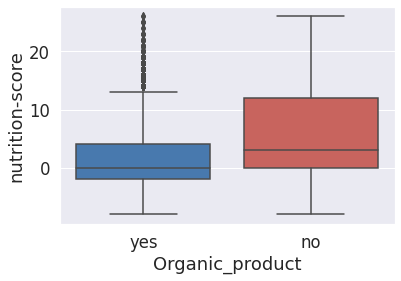

In [ ]:
sns.boxplot(data=df, x=df['Organic_product'], y=df["nutrition-score"], palette = custom_palette)

In [ ]:
StudentTestSigni(df[df['Organic_product'] == "no"]["nutrition-score"], df[df['Organic_product'] == "yes"]["nutrition-score"])

Les valeurs sont significativement différentes (p = 1.0907085281128271e-222)


Un produit bio aura donc généralement un meilleur score nutritif, on peut dans le cadre de notre application utiliser ces deux variables pour construire notre score global

Un produit bio possède t-il forcement moins d'additif ?

Les valeurs sont significativement différentes (p = 0.0)


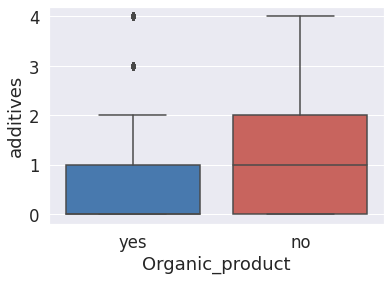

In [ ]:
sns.boxplot(data=df, x=df['Organic_product'], y=df["additives"], palette = custom_palette)
StudentTestSigni(df[df['Organic_product'] == "no"]["additives"], df[df['Organic_product'] == "yes"]["additives"])

Un produit bio aura donc généralement moins d'assitifs, on peut dans le cadre de notre application utiliser ces deux variables pour construire notre score global

## Analyse multivariée -- Aspect Planète

Un produit bio est-il forcement bon pour la planète ?

Les valeurs sont significativement différentes (p = 2.4225688387223125e-291)


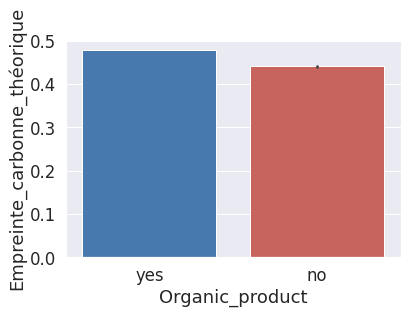

In [ ]:
sns.barplot(data=df, x=df['Organic_product'], y=df["Empreinte_carbonne_théorique"], palette = custom_palette)
StudentTestSigni(df[df['Organic_product'] == "no"]["Empreinte_carbonne_théorique"], df[df['Organic_product'] == "yes"]["Empreinte_carbonne_théorique"])

Un produit bio est donc moins bon pour la planète dans le sens où il est produit généralement moins proche du consommateur, son empreinte carbon étant suppérieur (ici on ne prend cependant pas en compte le fait qu'il ne nécessite pas de pesticide qui n'est pas bon pour la planète non plus), pour le calcul de score général cet aspect sera pris en compte

Les aliments produits en UE sont-ils généralement meilleurs pour la santé (nutriscore moins élevé) ?

Les valeurs sont significativement différentes (p = 3.832916843270418e-285)


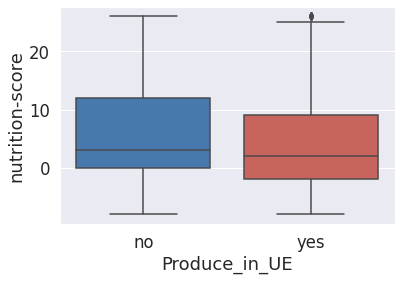

In [ ]:
sns.boxplot(data=df, x=df['Produce_in_UE'], y=df["nutrition-score"], palette = custom_palette)
StudentTestSigni(df[df['Produce_in_UE'] == "no"]["nutrition-score"], df[df['Produce_in_UE'] == "yes"]["nutrition-score"])

Les aliments produits en UE sont généralement meilleurs pour la santé. Un produit bon pour la planète est généralement aussi bon pour la santé (si on ne prend pas en compte les pesticides des produits non-bio)

# Calcul des scores "*Score santé*" et "*Score planète*" ainsi que le "*Score général*"

 **Calcul du "*Score Santé*"**

*Valeur = nutriscore (norm 1-2) + Organic product (1 ou 2) + additives (norm 1-2)*

Normalisation des données pour calcul du score santé

In [ ]:
def normalisation_function(df):
  """Fonction de normalisation entre 1 et 2 pour calcul du score santé"""
  normalized_df=(df-df.min())/(df.max()-df.min())
  return normalized_df+1

In [ ]:
df["nutrition-score_norm"] = normalisation_function(df["nutrition-score"])
df["additives_norm"] = normalisation_function(df["additives"])

In [ ]:
df['score_santé'] = df["nutrition-score_norm"] + df["additives_norm"] + np.where(df['Organic_product'] == "yes", 2, 1)

**Calcul du "*Score Planète*"**

*Valeur = Produce in UE (1 ou 2) + Organic product (1 ou 2)*

In [ ]:
df['score_planète'] = np.where(df['Produce_in_UE'] == "yes", 2, 1) + np.where(df['Organic_product'] == "yes", 2, 1)

**Calcul du "*Score Général*"**

*Valeur = Score Santé + Score Planète*

In [ ]:
df['score_général'] = df['score_santé'] + df['score_planète']

In [ ]:
df.head()

,code_bar,countries,product_name,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutrition-score,Produce_in_UE,Empreinte_carbonne_théorique,Organic_product,nutrition-score_norm,additives_norm,score_santé,score_planète,score_général
7,16124,États-Unis,Organic Muesli,2.0,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,7.0,no,0.48,yes,1.441176,1.50,4.941176,3,7.941176
15,18012,États-Unis,Cinnamon Nut Granola,0.0,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.0,no,0.48,no,1.235294,1.00,3.235294,2,5.235294
19,18227,États-Unis,Organic Oat Groats,0.0,1096.0,5.95,1.19,66.67,2.38,9.5,16.67,0.02540,-6.0,no,0.48,yes,1.058824,1.00,4.058824,3,7.058824
20,18265,États-Unis,Energy Power Mix,0.0,1464.0,17.50,7.50,42.50,32.50,5.0,7.50,0.28448,14.0,no,0.48,no,1.647059,1.00,3.647059,2,5.647059
21,18289,États-Unis,Antioxidant Mix - Berries & Chocolate,1.0,2092.0,33.33,6.67,46.67,30.00,6.7,13.33,0.46482,15.0,no,0.48,no,1.676471,1.25,3.926471,2,5.926471


In [ ]:
df.describe()

Fonction permettant de ressortir les scores en fonction du code barre

In [ ]:
def scores__calculator(code_barre):
  """Fonction de calcul du score santé en fonction du code barre fournit"""
  score_sante = round(float(df.loc[df['code_bar'] == code_barre, 'score_santé']),2)
  score_planete = round(float(df.loc[df['code_bar'] == code_barre, 'score_planète']),2)
  score_general = round(float(df.loc[df['code_bar'] == code_barre, 'score_général']),2)
  print("Le produit : '\x1B[3m" + str((df.loc[df['code_bar'] == code_barre, 'product_name']).values[0]) + "\x1B[0m' possède un :")
  print("Score santé de : " + str(score_sante))
  print("Score planète de : " + str(score_planete))
  print("Score général de : " + str(score_general))

In [ ]:
scores__calculator(16124)

Le produit : 'Organic Muesli' possède un :
Score santé de : 4.94
Score planète de : 3.0
Score général de : 7.94
